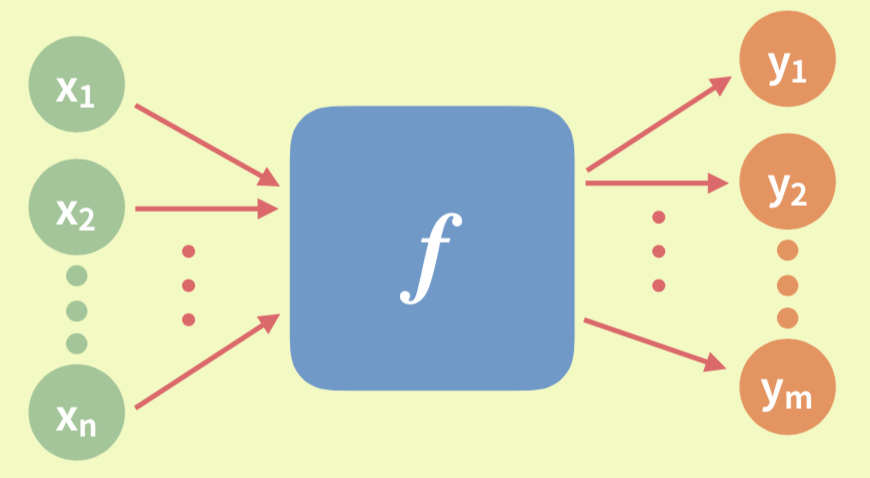

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
from my_ml_tools.my_ml_plot import Plot_decision_regions
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image
Image(filename = './chart/find_a_function.png', width=600)

## Linear Model: Logistic Regrssion (basics)
> #### Binary classification
> #### For multi-class ($k$-class) classification, the algorithm can build 
>> $k$ classifiers and use one-vs-rest (OvR) scheme, or   
>> $\frac{k(k-1)}{2}$ classifiers and use one-vs-one (OvO) scheme

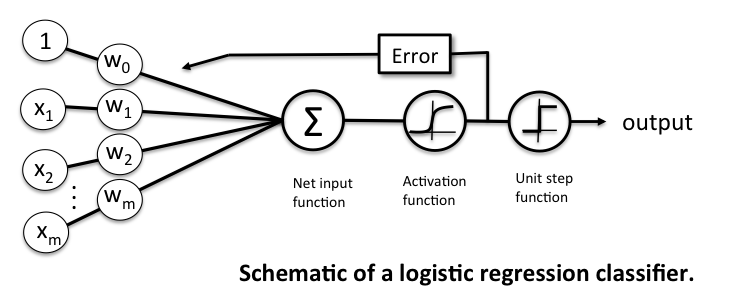

In [2]:
Image(filename = './chart/logistic_regression_schematic.png', width=600)

#### Net-Input function $z = w^T X$

#### Activation function: Sigmoid function    
> $\phi(z) = \frac {1}{1 + e^{-z}}$
  
#### Threshold (Decision) function or Quantizer for 2-class classification:    
> $ \hat{y} =
  \begin{cases}
    1 \text{  (positive)}    & \quad \text{if } \phi(x^T X)  \geq 0.5\\
    0 \text{  (negative)}    & \quad \text{otherwise}
  \end{cases}$

(0.0, 1.0, 0.0, 1.0)

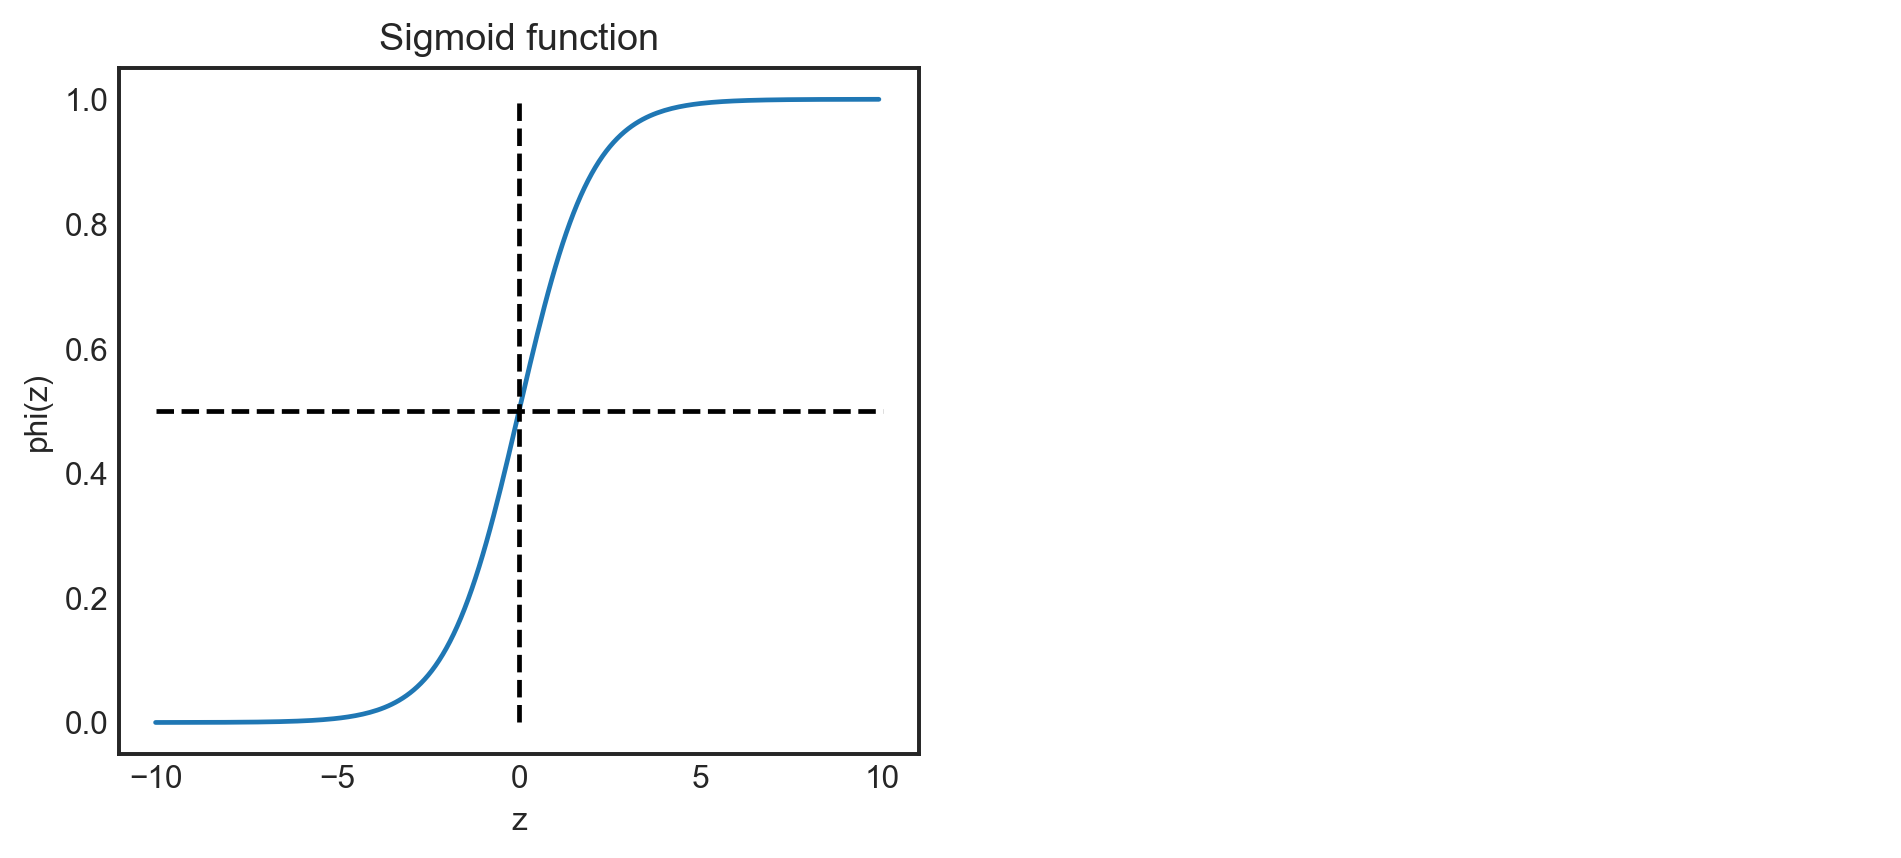

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# illustrate Sigmoid function
z = np.arange(-10, 10, 0.1)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].plot(z, sigmoid(z))
axes[0].plot([-10, 10], [0.5, 0.5], 'k--')
axes[0].plot([0, 0], [0, 1], 'k--')
axes[0].set_xlabel('z')
axes[0].set_ylabel('phi(z)')
axes[0].set_title('Sigmoid function')
axes[1].axis('off')

#### Introduction to Likelihood function
> $ L(w) = P(y | w ; X) = \prod_{i=1}^{n} P(y^{(i)} | w; X^{(i)})$
> $ = \prod_{i=1}^{n} (\phi (z^{(i)}))^{y^{(i)}} (1 - \phi (z^{(i)}))^{1 - y^{(i)}} $

> #### To maximize the Likelihood function --> to maximize the log-likelihood function

> $ l(w) = \text{log} L(w) = \sum_{i=1}^{n} \big[y^{(i)} \text{log} (\phi (z^{(i)})) + (1 - y^{(i)}) \text{log} (1 - \phi (z^{(i)})) \big] $

#### To apply Gradient Descent search, we define Cost function (Objective function) as   

> $ J(w) = -l(w) = \sum_{i=1}^{n} \big[-y^{(i)} \text{log} (\phi (z^{(i)})) - (1 - y^{(i)}) \text{log} (1 - \phi (z^{(i)})) \big] $

> #### For each instance, $J(\phi(z), y; w) = -y \text{log} (\phi (z)) - (1 - y) \text{log} (1 - \phi (z))$
> $J(\phi(z), y; w) = \begin{cases}
    -\text{log} (\phi(z))    & \quad \text{if } y = 1\\
    -\text{log} (1 - \phi(z))    & \quad \text{if } y = 0
  \end{cases}$


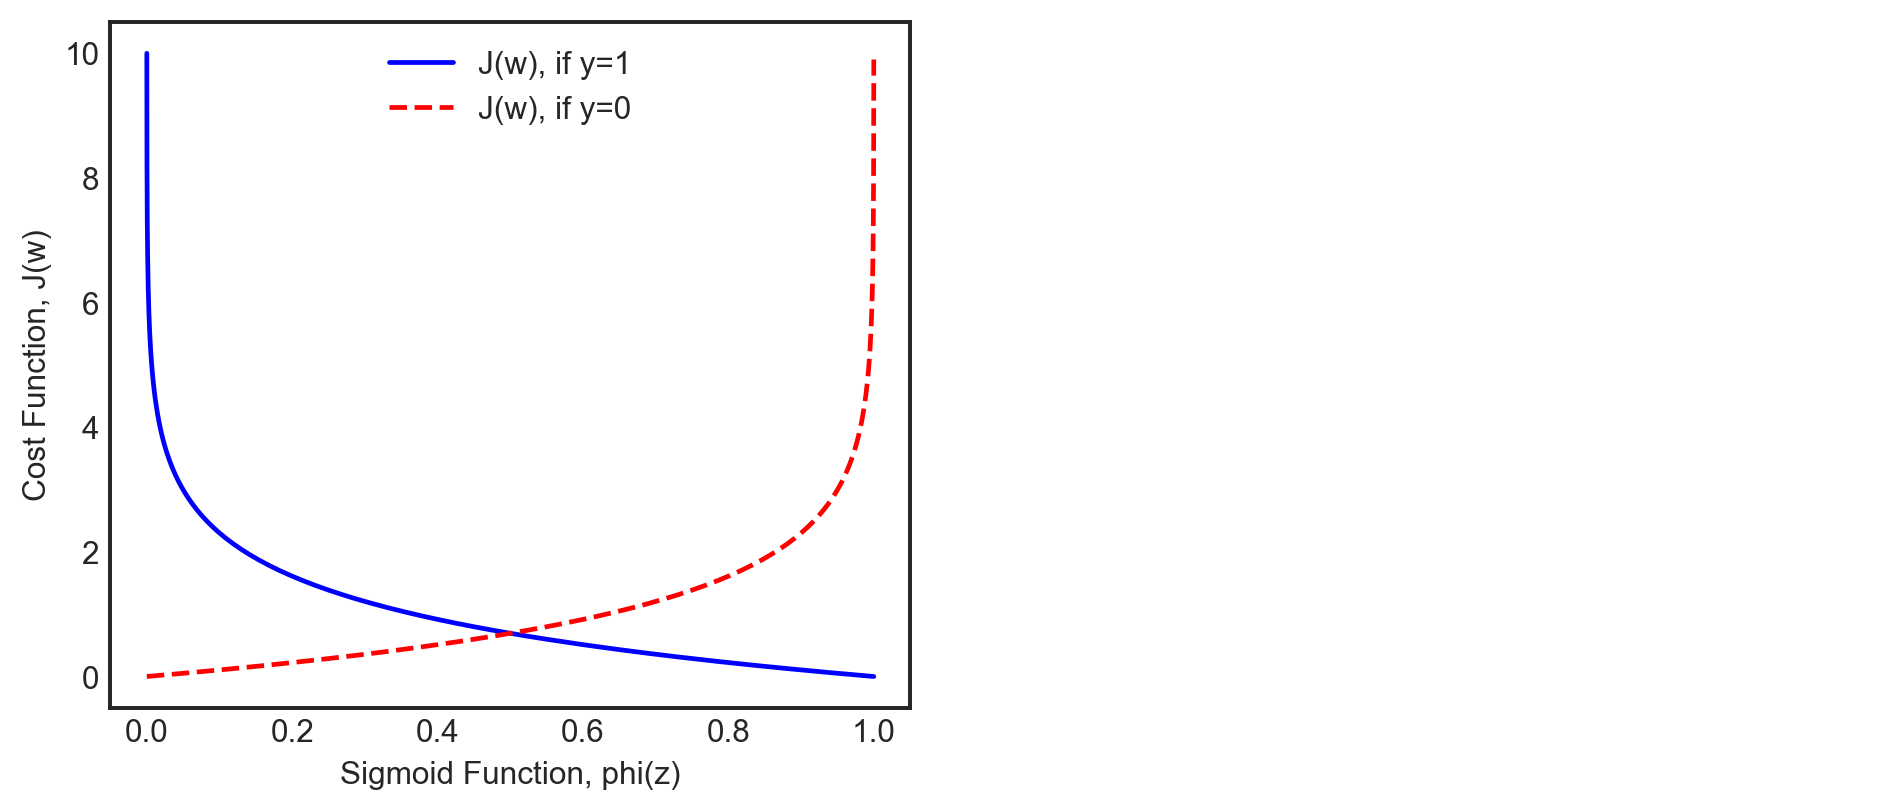

In [4]:
def demoCost():
    z = np.arange(-10, 10, 0.1)
    phi_z = sigmoid(z)
    
    fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
    axes[0].plot(phi_z, -np.log(phi_z), 'b-', label='J(w), if y=1')
    axes[0].plot(phi_z, -np.log(1 - phi_z), 'r--', label='J(w), if y=0')
    axes[0].set_xlabel('Sigmoid Function, phi(z)')
    axes[0].set_ylabel('Cost Function, J(w)')
    axes[0].legend()
    axes[1].axis('off')
    
demoCost()

### (Batch) Gradient Descent
#### Before we move on,   
> $\frac{\partial}{\partial z} \phi(z) = \frac{\partial}{\partial z} \frac{1}{1+e^{-z}} = \frac{1}{(1+e^{-z})^2} e^{-z} = \frac{1}{1+e^{-z}} \big( 1- \frac{1}{1+e^{-z}} \big)$
> $ = \phi(z) (1 - \phi(z))$

> $\frac{\partial}{\partial w_j} l(w) = \big(y \frac{1} {\phi(z)} - (1-y) \frac{1} {1 - \phi(z)}\big) \frac{\partial} {\partial w_j} \phi(z)$   
> $ \quad \quad \quad = \big(y \frac{1} {\phi(z)} - (1-y) \frac{1} {1 - \phi(z)}\big) \frac{\partial} {\partial z} \phi(z) \frac{\partial}{\partial w_j} z$   
> $ \quad \quad \quad = \big(y \frac{1} {\phi(z)} - (1-y) \frac{1} {1 - \phi(z)}\big) \phi(z) (1 - \phi(z)) \frac{\partial}{\partial w_j} z$  
> $ \quad \quad \quad = \big(y (1-\phi(z)) - (1-y)\phi(z)\big) x_j$  
> $ \quad \quad \quad = (y-\phi(z)) x_j$

#### To update each $w_j$ simultaneously    
> $w_j := w_j + \eta \sum_{i=1}^{n} \big(y^{(i)} - \phi(z^{(i)})\big)x_j^{(i)}$

In [5]:
class myLogistic(object):
    def __init__(self, eta=0.05, max_iter=100, random_state=1):
        self.eta = eta
        self.max_iter = int(max_iter)
        self.random_state = random_state
        
    def fit(self, X, y):
        rng = np.random.RandomState(self.random_state)
        self.w_ = rng.normal(loc=0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = [self.cost(X, y)]
        
        for i in range(self.max_iter):
            output = self.activation(self.net_input(X))
            self.w_ += self.eta * np.c_[np.ones(X.shape[0]), X].T.dot(y - output)
            self.cost_.append(self.cost(X, y))
        return self
    
    def net_input(self, X):
        return np.dot(np.c_[np.ones(X.shape[0]), X], self.w_)
        
    def activation(self, z):
        z = np.clip(z, -250, 250)
        return 1 / (1 + np.exp(-z))
    
    def cost(self, X, y):
        output = self.activation(self.net_input(X))
        J = -y.dot(np.log(output)) - (1-y).dot(np.log(1 - output))
        return J
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    def score(self, X, y):
        return (self.predict(X) == y).sum() / y.size

### Example-1A: Iris (use myLogistic)
#### Classification: 2 features, 2 classes
(original dataset contain 4 features and 3 classes)

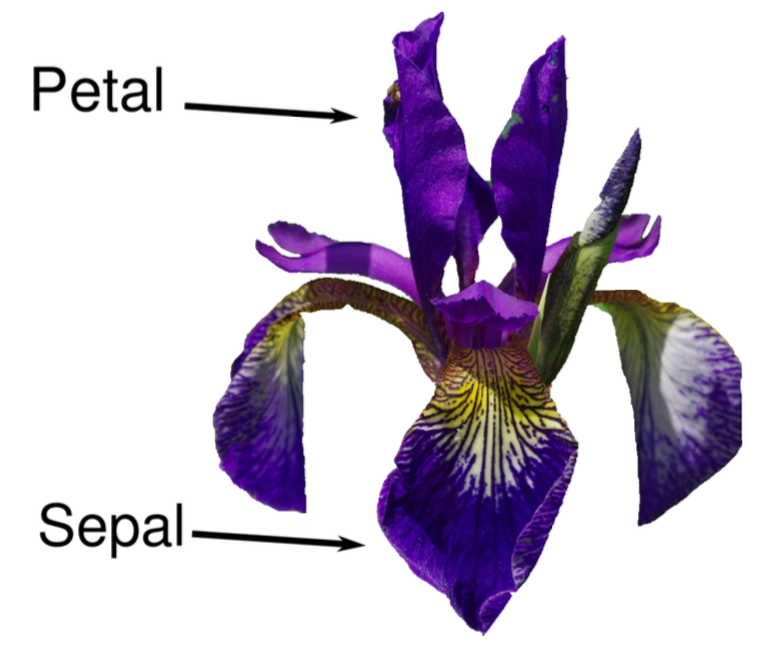

In [6]:
Image(filename = './chart/iris.png', width=400)

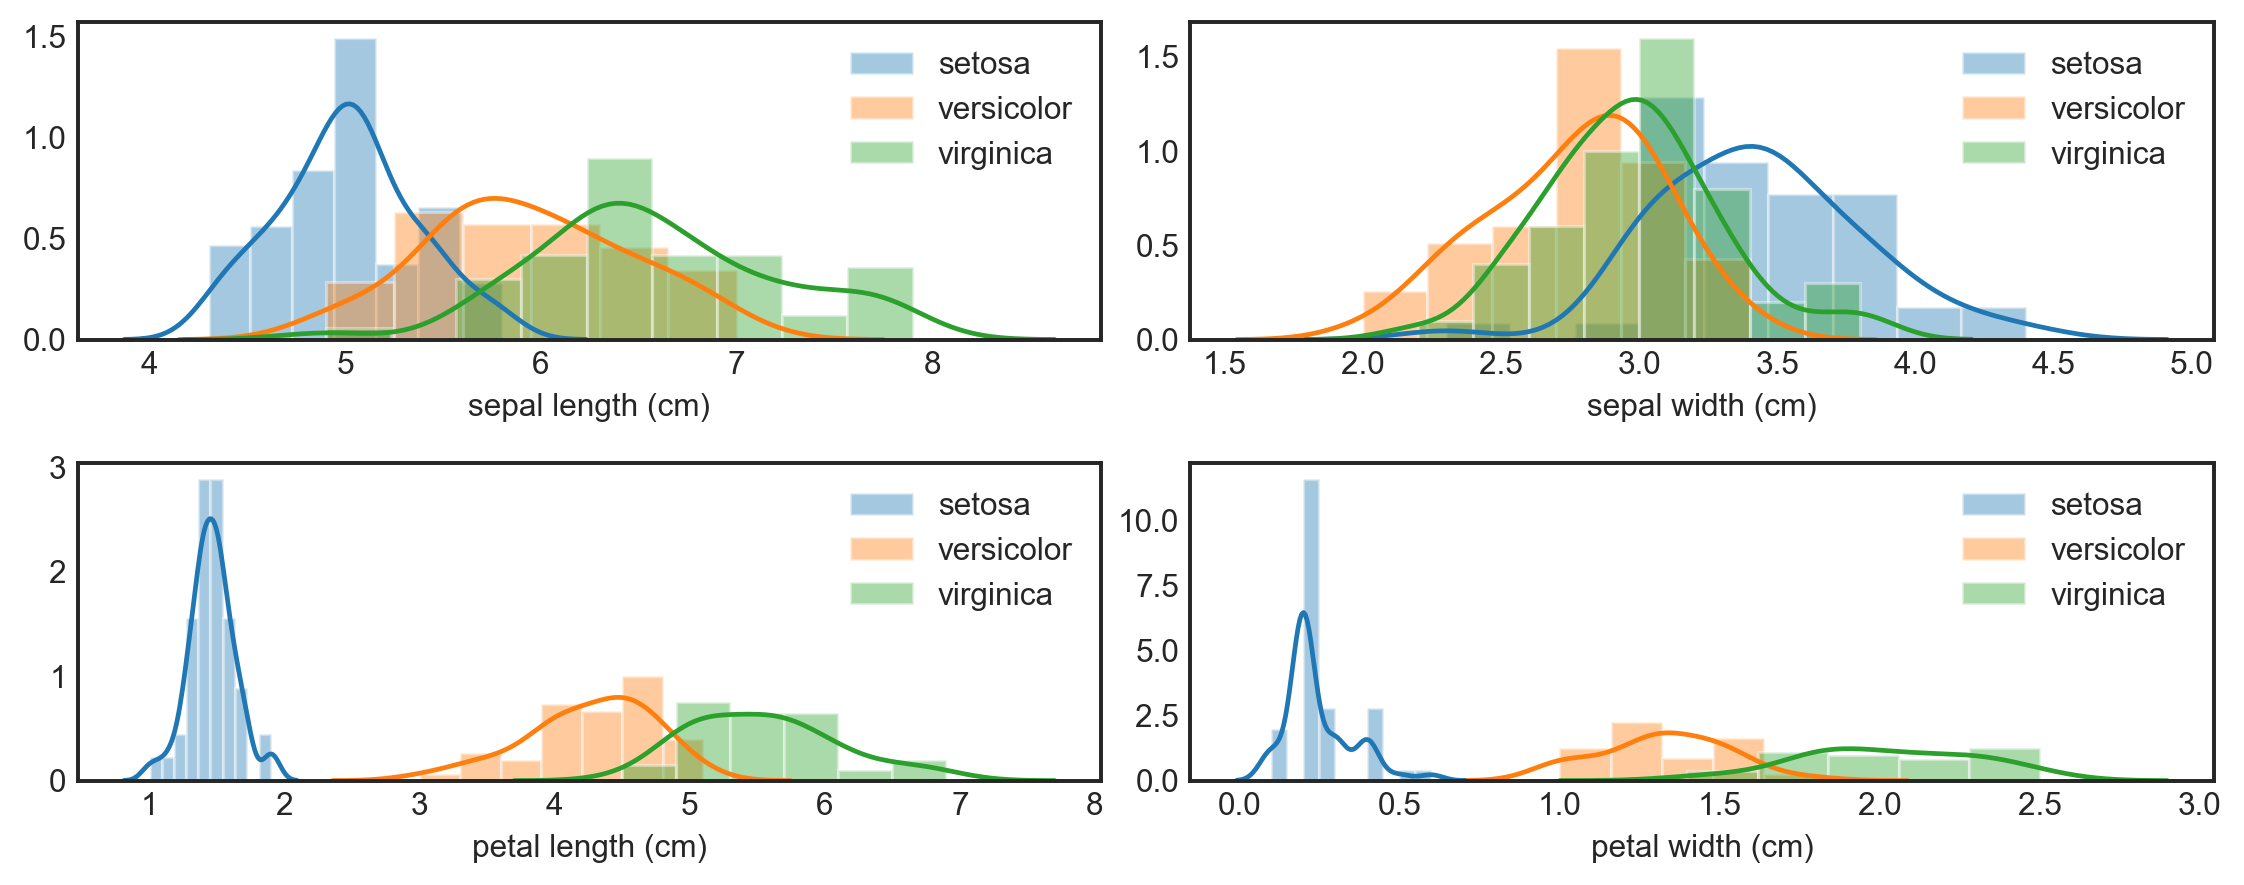

In [7]:
# Check univariate distribution of observations.
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

fig, axes = plt.subplots(2, 2, dpi=227, figsize=(10, 4))
for col, ax in zip(df.columns, axes.ravel()):
    mask = (iris.target == 0)
    sns.distplot(df[col][iris.target == 0], ax=ax, hist_kws={'edgecolor': 'w'}, label='setosa')
    sns.distplot(df[col][iris.target == 1], ax=ax, hist_kws={'edgecolor': 'w'}, label='versicolor')
    sns.distplot(df[col][iris.target == 2], ax=ax, hist_kws={'edgecolor': 'w'}, label='virginica')
    ax.set_xlabel(col)
    ax.legend()

plt.tight_layout()

(0.0, 1.0, 0.0, 1.0)

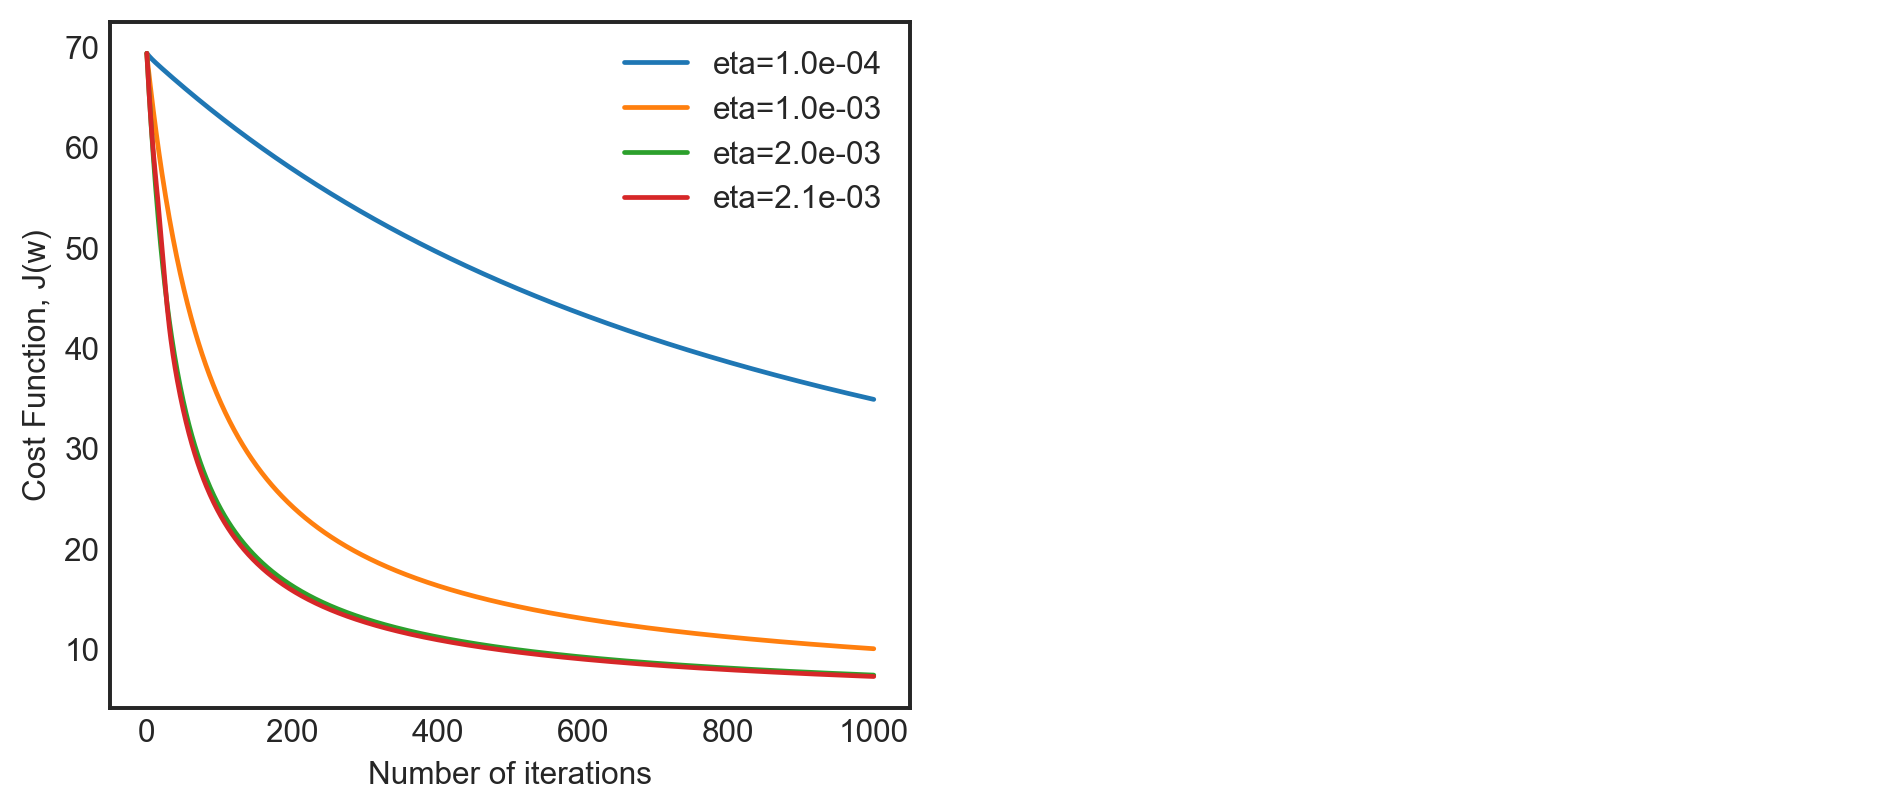

In [8]:
iris = load_iris()
X1 = iris.data[:100, :2]
y1 = iris.target[:100]

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))

max_iter = 1000
for eta in [1e-4, 1e-3, 2e-3, 2.1e-3]:
    clf = myLogistic(eta=eta, max_iter=max_iter)
    clf.fit(X1, y1)
    axes[0].plot(clf.cost_, label=f'eta={eta:.1e}')
axes[0].legend()
axes[0].set_xlabel('Number of iterations')
axes[0].set_ylabel('Cost Function, J(w)')
axes[1].axis('off')

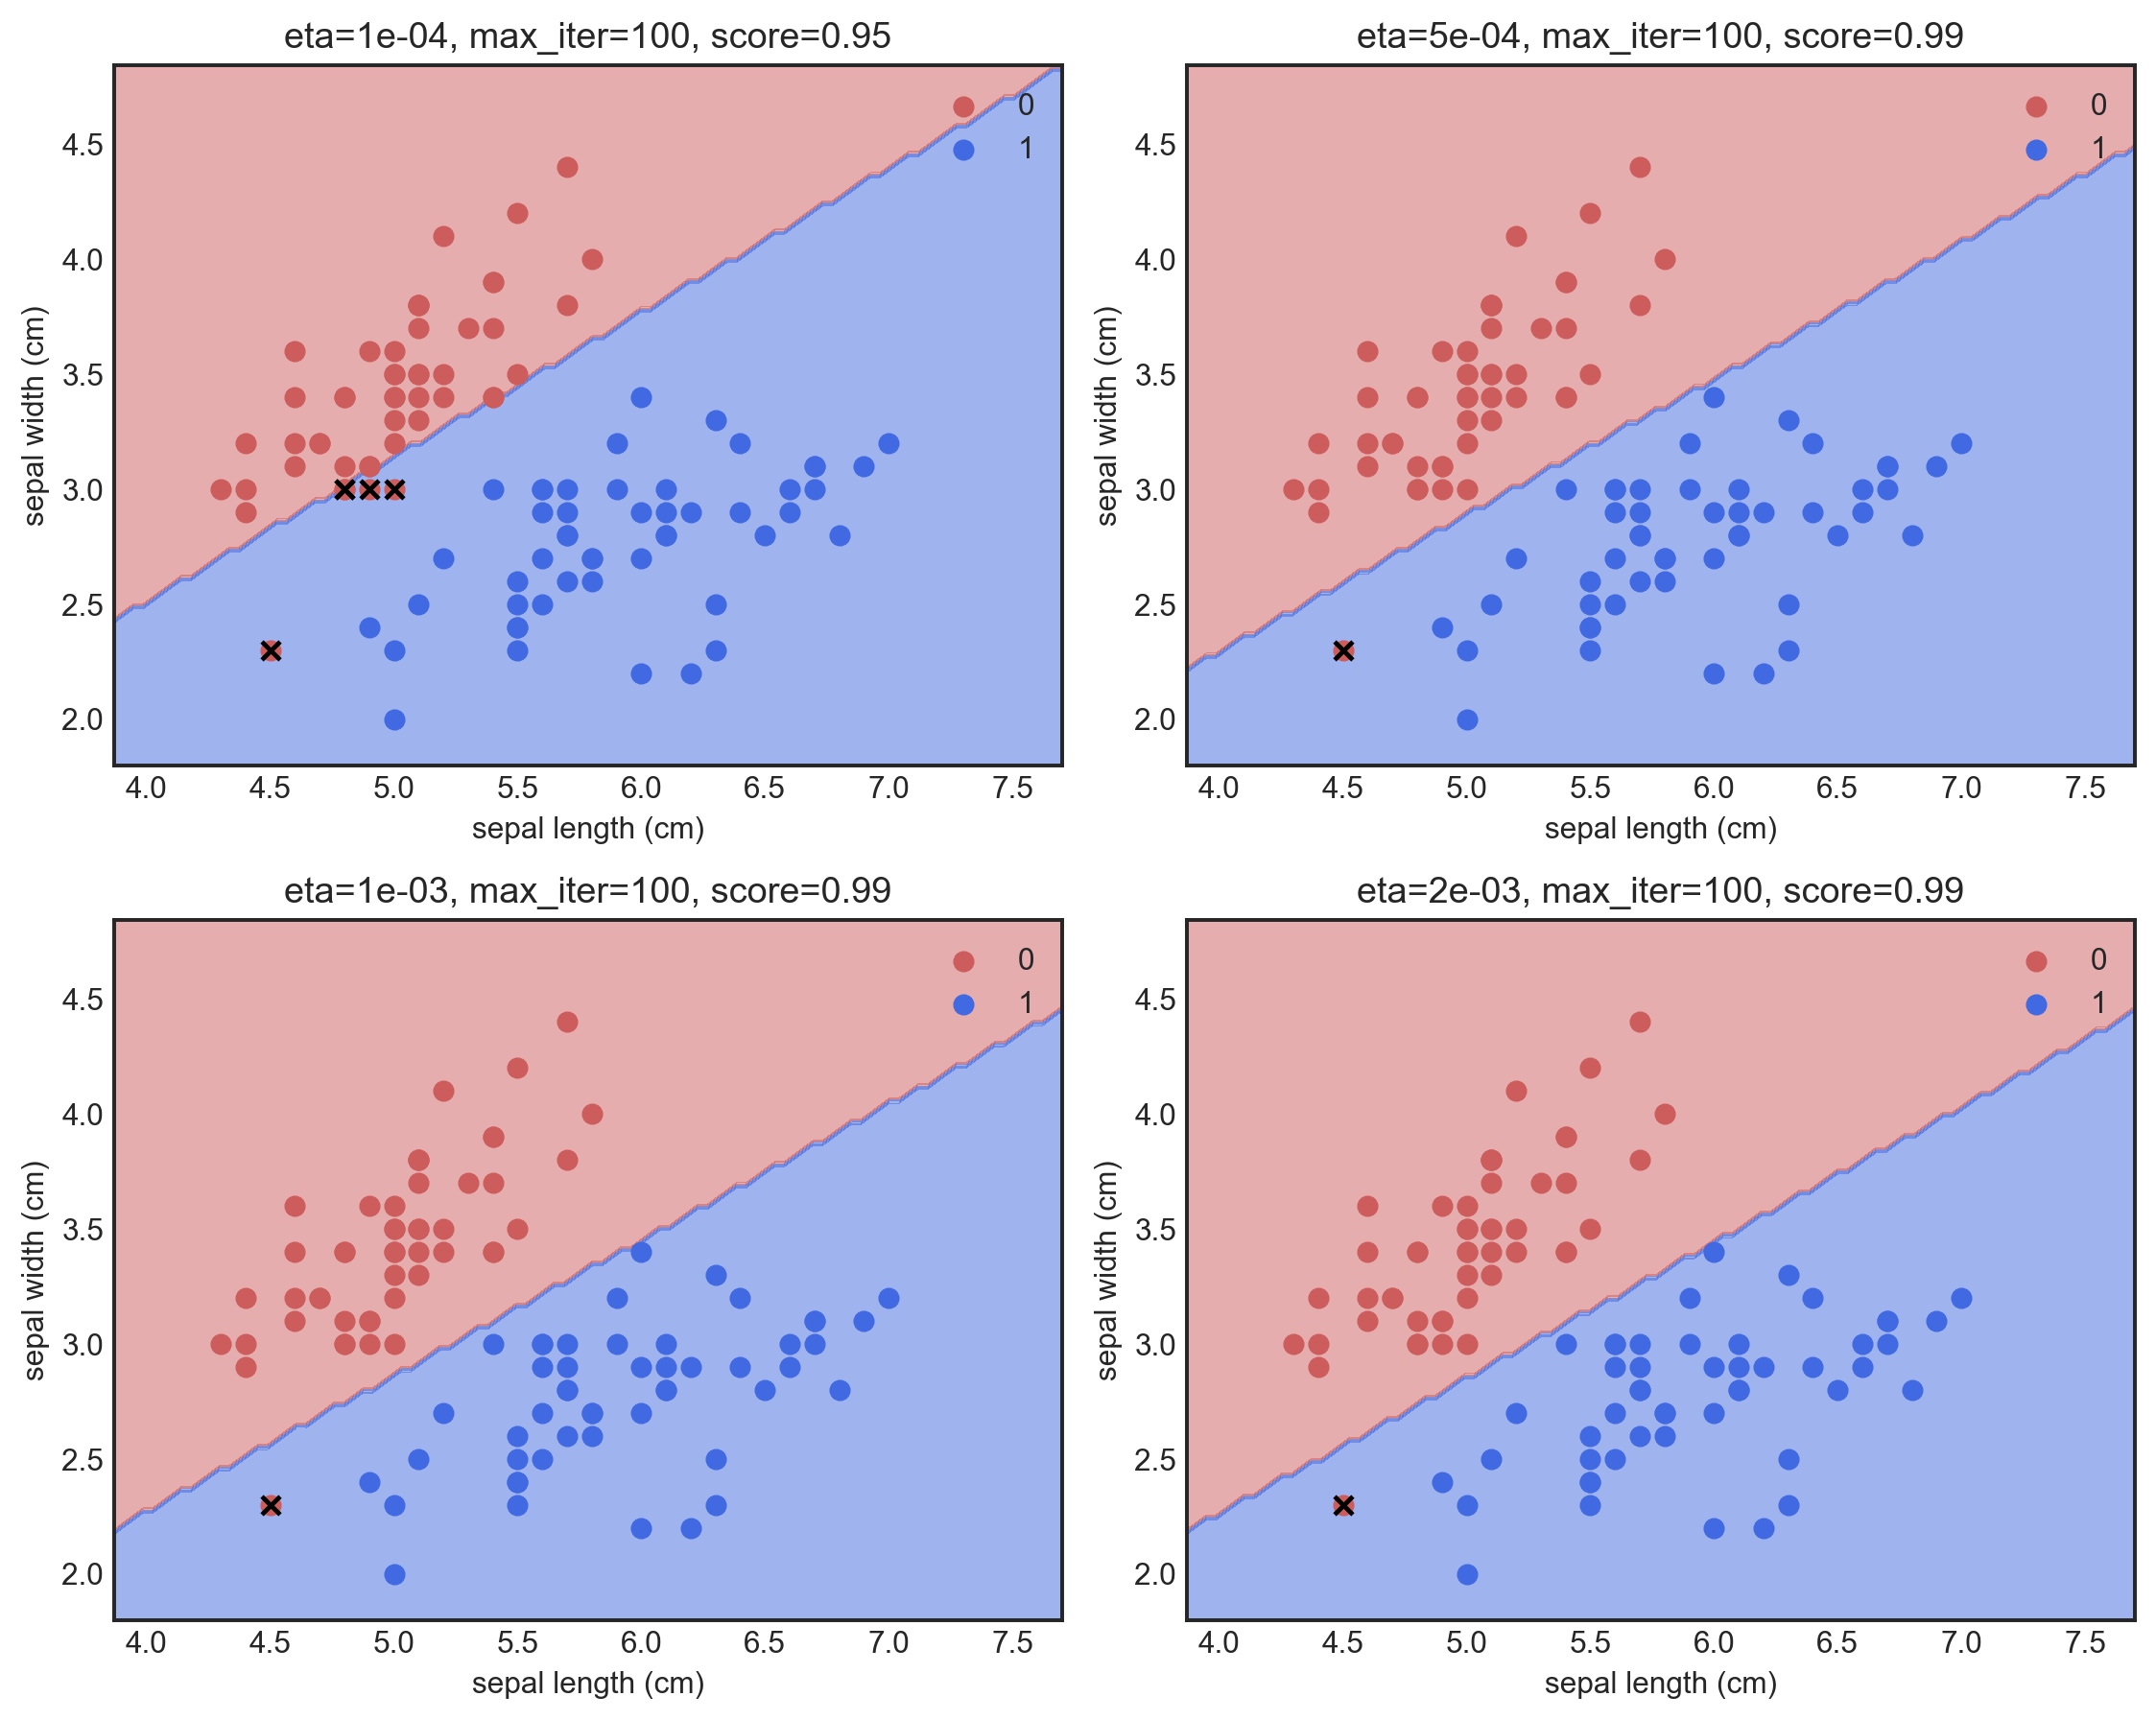

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data[:100, :2]
y1 = iris.target[:100]

fig, axes = plt.subplots(2, 2, dpi=227, figsize=(10, 8))
max_iter = 100
etas = [1e-4, 5e-4, 1e-3, 2e-3]
for ax, eta in zip(axes.ravel(), etas):
    clf = myLogistic(eta=eta, max_iter=max_iter)
    clf.fit(X1, y1)
    Plot_decision_regions(clf, X1, y1, ax=ax)
    ax.set_title(f'eta={eta:.0e}, max_iter={max_iter}, score={clf.score(X1, y1):.2f}')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
plt.tight_layout()

### Example-1B: Iris (use Scikit-learn)
#### Classification: 2 features, 2 classes
(original dataset contain 4 features and 3 classes)

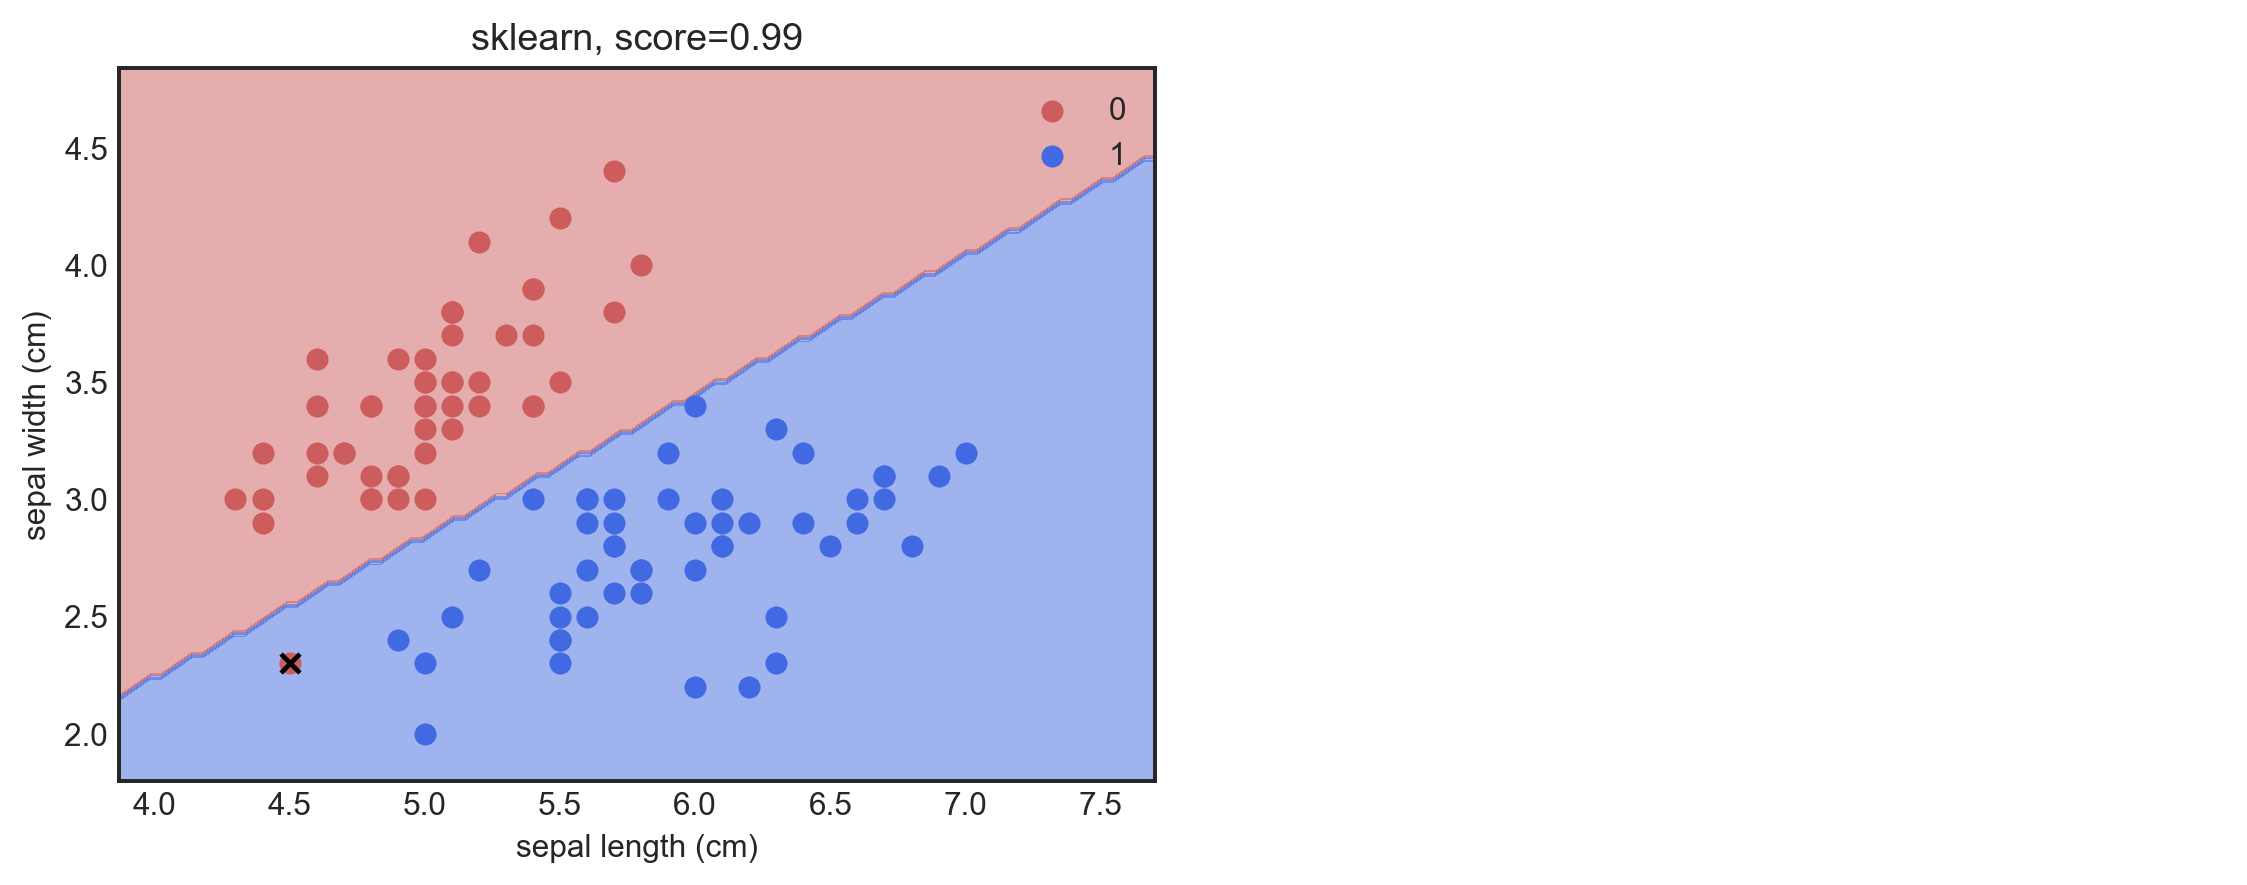

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X1, y1)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
Plot_decision_regions(clf, X1, y1, ax=axes[0])
axes[0].set_title(f'sklearn, score={clf.score(X1, y1):.2f}')
axes[0].set_xlabel(iris.feature_names[0])
axes[0].set_ylabel(iris.feature_names[1])
axes[1].axis('off')
plt.tight_layout()

### Example-1C: Iris (use Scikit-learn)
#### Classification: 4 features, 3 classes

### Regularization
#### Add a regularization term to keep $w$ small. The larger the $\lambda$ is, the stronger is the regularization.
$ J(w) = \sum_{i=1}^{n} \big[-y^{(i)} \text{log} (\phi (z^{(i)})) - (1 - y^{(i)}) \text{log} (1 - \phi (z^{(i)})) \big] +
\frac{\lambda}{2} ||w||^2$ 

#### $C$: Inverse of regularization strength
> Increase $C$: weaker regularization -> complex model -> could lead to overfitting   
> Decrease $C$: stronger regularization -> simple model -> could lead to underfitting

Test score = 0.32
Test score = 0.82
Test score = 0.95


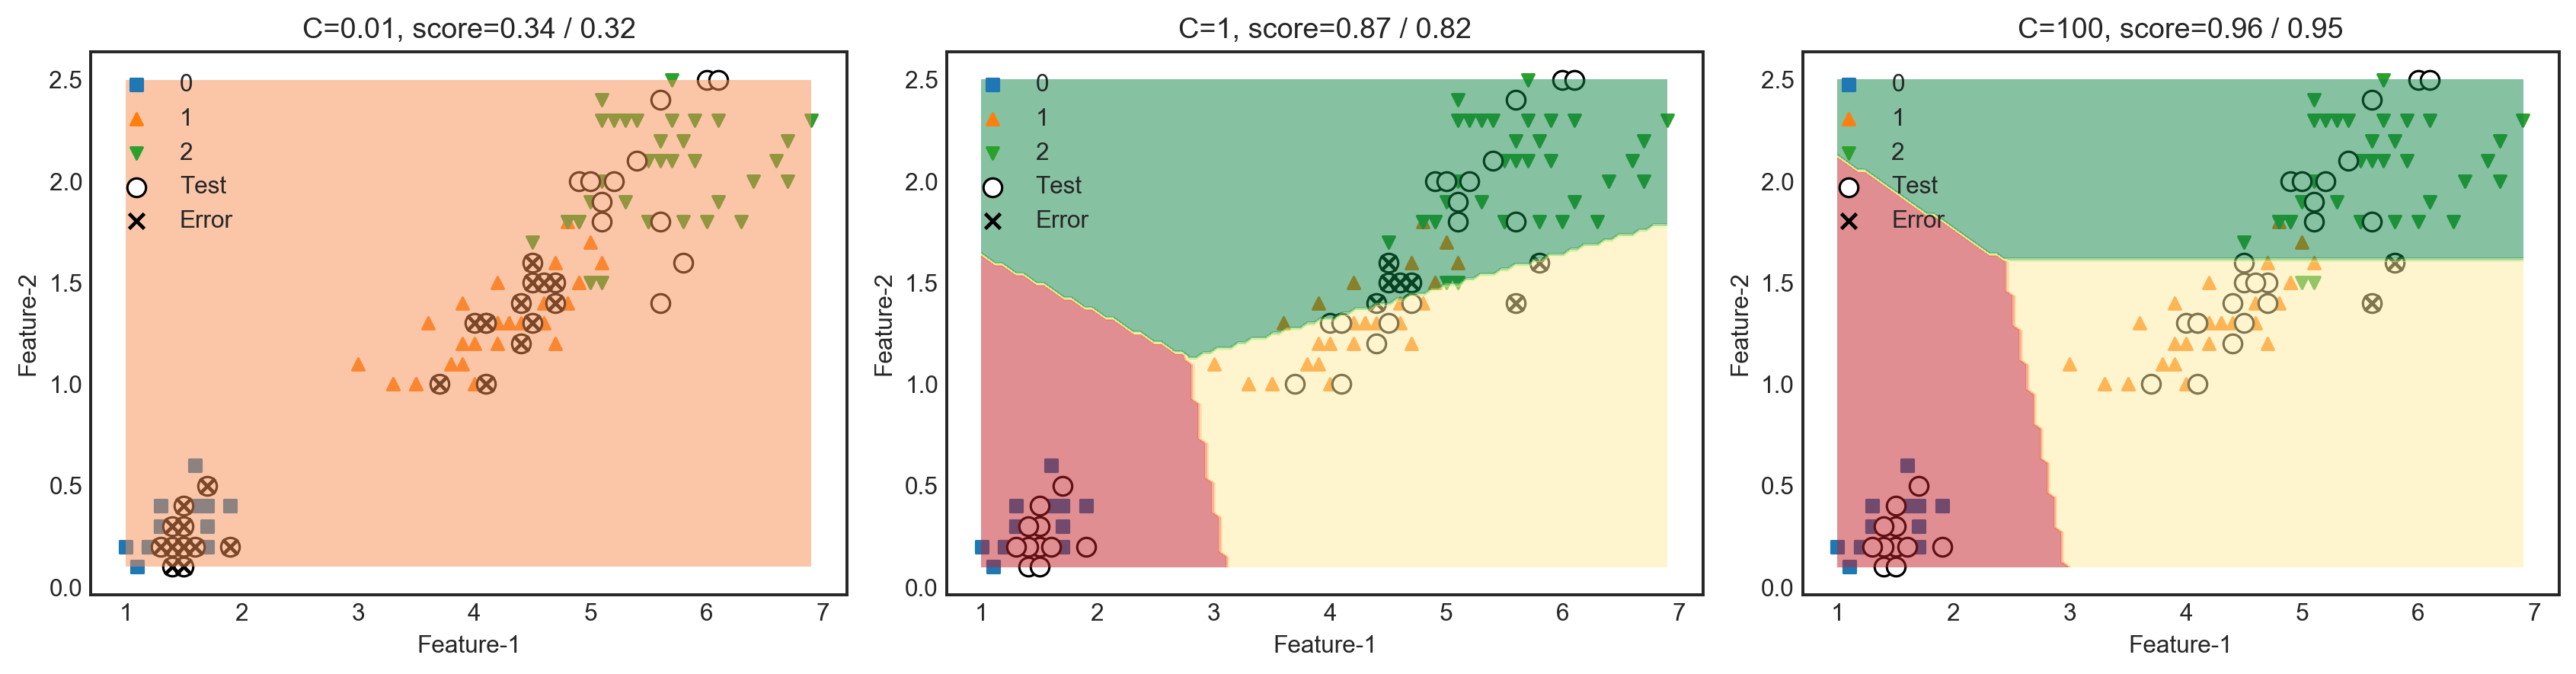

In [13]:
from my_ml_tools.my_ml_plot import Plot_decision_multi_class
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X = X[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

fig, axes = plt.subplots(1, 3, dpi=227, figsize=(15, 4))

for (ax, C) in zip(axes.ravel(), [0.01, 1, 100]):
    clf = LogisticRegression(C=C, random_state=0)
    clf.fit(X_train, y_train)
    Plot_decision_multi_class(clf, X_train, X_test, y_train, y_test, ax=ax)
    ax.set_title(f'C={C}, score={clf.score(X_train, y_train):.2f} / {clf.score(X_test, y_test):.2f}')
    
plt.tight_layout()
plt.savefig('output/fig.png')